<a href="https://colab.research.google.com/github/nicobargioni/procesamiento-del-habla/blob/main/Nicolas_Barigoni_TP1_webscrapping_preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP1 PROCESAMIENTO DEL HABLA

**Nicolás Bargioni**


* Resolver las consignas comentando el código fuente, indicando desde dónde fue extraido o generado.

* Explicar y justificar cada paso realizado.

* Publique enlace público a su notebook en google colab y también enlace a su repositorio github de la materia.


### Entrega de los ejercicios

1. Crea un repositorio GitHub público dedicado a esta materia.
2. Sube tus notebooks de resolución para cada desafío allí.
3. Por cada desafío utilizaremos un sólo notebook.
4. Debes entregar tu TP1 en el foro correspondiente, siguiendo las instrucciones que allí indica.




## EJERCICIO CONSIGNA

* Cree una nube de palabras de un texto en español.

* Dicho texto puede ser descargado de Internet (webscrapping) o extraído del dataset de alguna librería.

* Puede usar cualquier libreria o herramienta para obtener el texto de su interés.

* En este notebook explica el paso a paso del proceso.



## 1- Webscrapping

Extrae un texto de Internet de una sóla página web usando alguna de las técnicas de webscrapping vistas en clase. Busca el discurso de alguna persona quien te inspire o haya dado una charla motivadora.

No puedes repetir ni usar ni el mismo texto ni la misma web que otra persona quien ya entregó en el foro.

Abajo añade los bloques de código y texto necesarios. Explica paso a paso como descargaste el texto de tu interés.


#Texto elegido
## El texto que voy a scrapear es el del discurso de Steve Jobs en la ceremonia de graduación de Stanford en 2005.


In [40]:
#@title Importo librerías
import requests
from bs4 import BeautifulSoup

In [41]:
url = "https://news.stanford.edu/stories/2005/06/youve-got-find-love-jobs-says"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36"
}

response = requests.get(url, headers=headers)
response.raise_for_status()  # Lanza un error si la respuesta no es 200

soup = BeautifulSoup(response.content, "html.parser")

# Extraer todo el texto del div con clase 'su-page-content'
div = soup.find("div", class_="su-page-content")
if div:
    texto = div.get_text(separator="\n", strip=True)
    print(texto)
else:
    print("No se encontró el div con la clase 'su-page-content'.")

I am honored to be with you today at your commencement from one of the finest universities in the world. I never graduated from college. Truth be told, this is the closest I’ve ever gotten to a college graduation. Today I want to tell you three stories from my life. That’s it. No big deal. Just three stories.
The first story is about connecting the dots.
I dropped out of Reed College after the first 6 months, but then stayed around as a drop-in for another 18 months or so before I really quit. So why did I drop out?
It started before I was born. My biological mother was a young, unwed college graduate student, and she decided to put me up for adoption. She felt very strongly that I should be adopted by college graduates, so everything was all set for me to be adopted at birth by a lawyer and his wife. Except that when I popped out they decided at the last minute that they really wanted a girl. So my parents, who were on a waiting list, got a call in the middle of the night asking: “We 

## 2- Preprocesamiento

In [42]:
#@title Spacy

#Descargo, importo y cargo el modelo
!python -m spacy download en_core_web_sm

# Importar el modelo y cargarlo
import en_core_web_sm
nlp = en_core_web_sm.load()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 31.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


### 2.1 Muestra las stop words que tenga tu texto.

In [43]:
# Proceso el texto descargado
doc = nlp(texto)

# Extraigo stopwrods de doc
stopwords_en_texto = set([token.text.lower() for token in doc if token.is_stop])

# Muestro las stopwords ordenadas alfabéticamente
for word in sorted(stopwords_en_texto):
    print(word)

a
about
across
after
again
all
almost
along
already
always
am
amount
an
and
another
any
are
around
as
at
back
be
because
become
been
before
being
between
but
by
ca
call
can
could
did
do
down
during
each
else
even
ever
every
everything
except
few
first
five
for
from
get
give
go
had
has
have
he
here
him
his
how
i
if
in
into
is
it
its
just
keep
last
less
made
make
many
me
might
more
most
much
my
myself
never
next
no
none
not
now
n’t
of
off
on
one
only
or
other
others
our
out
over
own
part
perhaps
put
quite
really
say
see
several
she
should
since
six
so
somehow
someone
something
sometimes
still
take
than
that
the
their
them
then
there
these
they
third
this
three
through
throughout
to
together
too
two
under
until
up
us
very
was
we
well
were
what
whatever
when
whenever
where
which
who
whole
why
will
with
would
yet
you
your
yourself
’d
’ll
’m
’s
’ve


### 2.2 Quita las stop-words, caracteres extraños del texto. Utiliza el texto restante para crear una nube de palabras. Usa la biblioteca worldcloud de python.

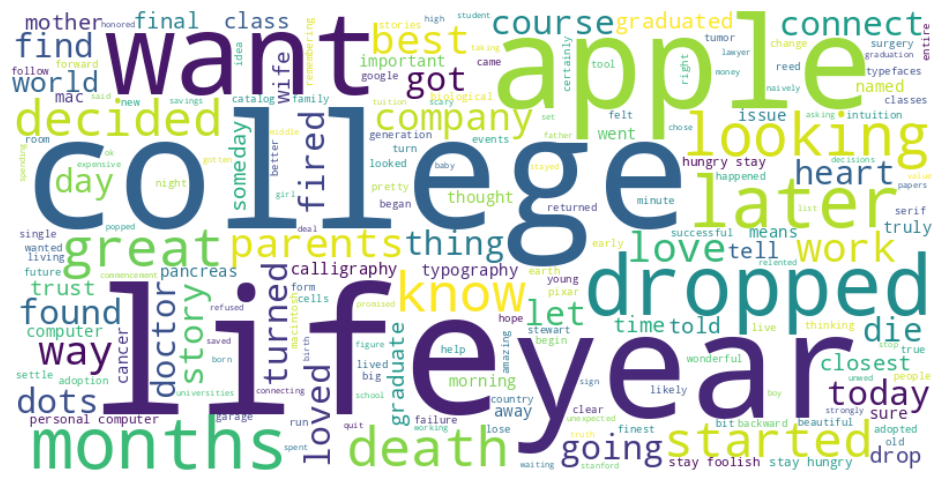

In [44]:
#Importo las librerías

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Quito stopwords, signos de puntuación y espacios
tokens_limpios = [
    token.text.lower() for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Uno tokens en un solo string para la nube de palabras
texto_limpio = " ".join(tokens_limpios)

# Creo y muestro la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_limpio)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 2.3 Usando el texto que conseguiste en el punto 1).



#### 2.3.1 Limpia y preprocesa el texto, descomponelo en oraciones, arma una matriz documento-vocabulario.


In [45]:
#title Descomposición en oraciones

# Hago la descomposición SOBRE EL DOCUMENTO ORIGINAL
# porque si lo hiciera sobre el que no tiene stopwords, rompo la lógica de las frases.
# Por ejemplo: una conjunción "and" en una oración, eliminada, deja dos oraciones forzadas en una sola sin lógica

# Extraer cada oración (sentence) como string limpio
oraciones = [sent.text.strip() for sent in doc.sents]

# Muestro las n primeras oraciones
for i, oracion in enumerate(oraciones[:5]):
    print(f"{i+1}. {oracion}")

1. I am honored to be with you today at your commencement from one of the finest universities in the world.
2. I never graduated from college.
3. Truth be told, this is the closest I’ve ever gotten to a college graduation.
4. Today I want to tell you three stories from my life.
5. That’s it.


In [65]:
#@title Matriz documento-vocabulario

from sklearn.feature_extraction.text import CountVectorizer

# Usar la lista 'oraciones' obtenida antes
vectorizer = CountVectorizer(stop_words='english')

# Ajustar y transformar las oraciones en la matriz documento-vocabulario
matriz = vectorizer.fit_transform(oraciones)

In [66]:
#@title Visualizo la matriz

import pandas as pd

df = pd.DataFrame(
    matriz.toarray(),
    columns=vectorizer.get_feature_names_out(),
    index=oraciones
)

df

,000,10,17,18,1960s,1970s,20,30,33,35,adopted,adoption,adult,adventurous,advised,affairs,age,agent,ago,amazing,anew,animated,animation,answer,apologize,apple,application,approach,artistically,asked,asking,avoid,away,awful,baby,backward,badly,baton,beautiful,beautifully,began,begin,beginner,believe,beneath,best,better,bibles,big,billion,biological,biopsy,birth,bit,board,bob,born,bottles,bought,boy,brand,brick,brought,buttoned,buy,called,calligraphed,calligraphy,came,cameras,campus,cancer,capture,catalog,cells,certainly,certainty,change,changed,choices,chose,class,classes,clear,cleared,clearly,clears,closest,code,coke,college,combinations,commencement,company,computer,computers,concept,connect,connecting,convinced,copied,couldn,country,courage,course,cover,create,created,creation,creative,crying,curable,curiosity,current,david,dawn,day,days,dead,deal,death,decades,decided,decisions,deposits,designed,designing,desktop,destination,destiny,devastating,developed,diagnosed,diagnosis,did,didn,die,difference,different,directors,diverge,doctor,doctors,dogma,don,dorm,dots,dramatic,drawer,drop,dropped,dropping,drown,earlier,early,earth,easy,embarrassment,employees,encountered,endoscope,enter,entire,entrepreneurs,escaped,evening,events,eventually,example,expect,expectations,expensive,external,face,facing,failure,faith,fall,falling,family,far,farewell,fascinating,father,fear,feature,fell,fellow,felt,figure,film,final,fine,finest,fired,floor,focus,follow,following,fonts,food,foolish,form,forward,freed,friends,future,garage,generation,gets,getting,girl,going,gone,good,goodbyes,google,got,gotten,gradually,graduate,graduated,graduates,graduation,great,grew,grown,guess,gut,hadn,hand,happened,hard,hare,haven,having,head,heart,heaven,heaviness,help,high,hired,historical,hitchhiking,hits,home,honored,hope,hungry,idea,idealistic,important,impossible,impression,incurable,inner,instruction,intellectual,interesting,intestines,intuition,invention,issue,issues,just,karma,kept,kids,kind,know,krishna,label,large,late,later,laurene,lawyer,learn,learned,leaving,let,letter,life,lightness,like,likely,limited,list,live,lived,living,ll,long,longer,looked,looking,lose,loss,love,loved,lovers,lucky,mac,macintosh,make,makes,matters,meal,means,medicine,menlo,message,met,microscope,mid,middle,miles,minute,mirror,money,months,morning,mother,multiple,naively,naked,named,neat,need,needed,needle,new,night,noise,normal,notions,noyce,offered,ok,old,ones,opinions,order,overflowing,packard,pancreas,pancreatic,paperback,papers,parents,park,passed,past,patient,people,periods,personal,photograph,pixar,poetic,polaroid,popped,possible,poster,practical,prepare,pretty,previous,priceless,pride,promised,proportionally,public,publication,publicly,publishing,purely,quit,quite,quote,rare,read,really,reason,reed,refused,rejected,relationship,released,relented,remarkable,remembering,renaissance,replaced,required,results,returned,right,road,roll,romantic,room,rooms,row,run,running,said,sans,satisfied,saved,savings,say,scan,scary,school,science,scissors,screwing,second,secondary,sedated,serif,set,settle,share,showed,sided,sign,signed,single,slept,slowly,someday,soon,sorry,sort,space,spaced,spending,spent,stanford,start,started,stay,stayed,stewart,stomach,stop,stories,story,strongly,stuck,student,studio,stumbled,subtle,successful,sunday,sure,surgery,taking,talented,tasting,team,technology,tell,temple,thank,thing,things,thinking,thought,throat,time,today,told,tool,tools,touch,town,toy,trap,trapped,tried,true,truly,trust,truth,try,tuition,tumor,turn,turned,type,typefaces,typewriters,typography,unexpected,universities,unwed,useful,valley,value,varying,ve,viewed,visions,voice,waiting,walk,want,wanted,wants,wasn,waste,way,week,went,wife,windows,wish,wished,woman,wonderful,words,work,worked,working,world,woz,year,years,young
I am honored to be with you today at your commencement from one of the finest universities in the world.,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### 2.3.2 Determina la longitud de tu vocabulario.

In [67]:
#Es la cantidad de palabras únicas del vectorizador, o sea el total de columnas del df anterior

print("Cantidad de palabras únicas:", matriz.shape[1])

Cantidad de palabras únicas: 534



#### 2.3.3. Aplica TF-IDF a tu matriz documento-vocabulario

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Crear el vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Ajustar y transformar tus oraciones
tfidf_matrix = tfidf_vectorizer.fit_transform(oraciones)

In [69]:
# Lo paso a df para verlo mejor

tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf_vectorizer.get_feature_names_out(),
    index=oraciones
)

# Opcional: mostrar primeras filas
tfidf_df

,000,10,17,18,1960s,1970s,20,30,33,35,adopted,adoption,adult,adventurous,advised,affairs,age,agent,ago,amazing,anew,animated,animation,answer,apologize,apple,application,approach,artistically,asked,asking,avoid,away,awful,baby,backward,badly,baton,beautiful,beautifully,began,begin,beginner,believe,beneath,best,better,bibles,big,billion,biological,biopsy,birth,bit,board,bob,born,bottles,bought,boy,brand,brick,brought,buttoned,buy,called,calligraphed,calligraphy,came,cameras,campus,cancer,capture,catalog,cells,certainly,certainty,change,changed,choices,chose,class,classes,clear,cleared,clearly,clears,closest,code,coke,college,combinations,commencement,company,computer,computers,concept,connect,connecting,convinced,copied,couldn,country,courage,course,cover,create,created,creation,creative,crying,curable,curiosity,current,david,dawn,day,days,dead,deal,death,decades,decided,decisions,deposits,designed,designing,desktop,destination,destiny,devastating,developed,diagnosed,diagnosis,did,didn,die,difference,different,directors,diverge,doctor,doctors,dogma,don,dorm,dots,dramatic,drawer,drop,dropped,dropping,drown,earlier,early,earth,easy,embarrassment,employees,encountered,endoscope,enter,entire,entrepreneurs,escaped,evening,events,eventually,example,expect,expectations,expensive,external,face,facing,failure,faith,fall,falling,family,far,farewell,fascinating,father,fear,feature,fell,fellow,felt,figure,film,final,fine,finest,fired,floor,focus,follow,following,fonts,food,foolish,form,forward,freed,friends,future,garage,generation,gets,getting,girl,going,gone,good,goodbyes,google,got,gotten,gradually,graduate,graduated,graduates,graduation,great,grew,grown,guess,gut,hadn,hand,happened,hard,hare,haven,having,head,heart,heaven,heaviness,help,high,hired,historical,hitchhiking,hits,home,honored,hope,hungry,idea,idealistic,important,impossible,impression,incurable,inner,instruction,intellectual,interesting,intestines,intuition,invention,issue,issues,just,karma,kept,kids,kind,know,krishna,label,large,late,later,laurene,lawyer,learn,learned,leaving,let,letter,life,lightness,like,likely,limited,list,live,lived,living,ll,long,longer,looked,looking,lose,loss,love,loved,lovers,lucky,mac,macintosh,make,makes,matters,meal,means,medicine,menlo,message,met,microscope,mid,middle,miles,minute,mirror,money,months,morning,mother,multiple,naively,naked,named,neat,need,needed,needle,new,night,noise,normal,notions,noyce,offered,ok,old,ones,opinions,order,overflowing,packard,pancreas,pancreatic,paperback,papers,parents,park,passed,past,patient,people,periods,personal,photograph,pixar,poetic,polaroid,popped,possible,poster,practical,prepare,pretty,previous,priceless,pride,promised,proportionally,public,publication,publicly,publishing,purely,quit,quite,quote,rare,read,really,reason,reed,refused,rejected,relationship,released,relented,remarkable,remembering,renaissance,replaced,required,results,returned,right,road,roll,romantic,room,rooms,row,run,running,said,sans,satisfied,saved,savings,say,scan,scary,school,science,scissors,screwing,second,secondary,sedated,serif,set,settle,share,showed,sided,sign,signed,single,slept,slowly,someday,soon,sorry,sort,space,spaced,spending,spent,stanford,start,started,stay,stayed,stewart,stomach,stop,stories,story,strongly,stuck,student,studio,stumbled,subtle,successful,sunday,sure,surgery,taking,talented,tasting,team,technology,tell,temple,thank,thing,things,thinking,thought,throat,time,today,told,tool,tools,touch,town,toy,trap,trapped,tried,true,truly,trust,truth,try,tuition,tumor,turn,turned,type,typefaces,typewriters,typography,unexpected,universities,unwed,useful,valley,value,varying,ve,viewed,visions,voice,waiting,walk,want,wanted,wants,wasn,waste,way,week,went,wife,windows,wish,wished,woman,wonderful,words,work,worked,working,world,woz,year,years,young
I am honored to be with you today at your commencement from one of the finest universities in the world.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [71]:
tfidf_df.to_csv('td_idf_sj.csv', index = False)

In [70]:
tfidf_df.shape[1]

534

In [72]:
#@title Cálculo del tf-idf medio

tfidf_means = tfidf_df.mean(axis=0).sort_values(ascending=False)

# Mostrar los 20 términos con mayor TF-IDF promedio
top_tfidf = tfidf_means.head(20)
top_tfidf

,0
life,0.031637
stay,0.025464
college,0.024974
looking,0.022062
don,0.020416
know,0.017934
apple,0.016685
just,0.016098
love,0.016012
months,0.015969


# Conclusiones

La eliminación de stopwords en el procesamiento de este discurso permitió que la nube de palabras resaltara con claridad los conceptos y experiencias más significativos de la narrativa de Steve Jobs.

Palabras como life, college, apple, year, want, love, y death emergieron como términos centrales, reflejando fielmente los ejes temáticos de sus historias: la educación, la pasión, la superación personal y el valor de la vida.

Al filtrar las palabras vacías, se eliminó el ruido gramatical y se facilitó una visualización mucho más limpia de los tópicos recurrentes.

La técnica de la nube de palabras, potenciada por la eliminación de stopwords, es así una herramienta eficaz para el resumen semántico y la extracción de insights en proyectos de NLP aplicados a discursos, entrevistas o cualquier corpus textual extenso.

============================================
============================================

**Resultados respecto al tf-idf medio**

1. Palabras como "life", "college", "apple", "love", "death" y "work" reflejan perfectamente los ejes temáticos principales del discurso de Jobs.

2. Otras como "stay" y "foolish" están muy ligadas al mensaje inspirador de la frase “Stay Hungry. Stay Foolish.”

3. Términos como "looking", "know", "want", "fired", y "loved" a priori muestran el enfoque personal, los desafíos y los cambios en la vida Steve Jobs.

4. La presencia de palabras como "didn", "don", "just" muestra que el discurso es conversacional y cercano, propio de un relato autobiográfico y motivacional.